# Homework

---

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference</u> for this data and model specification.*


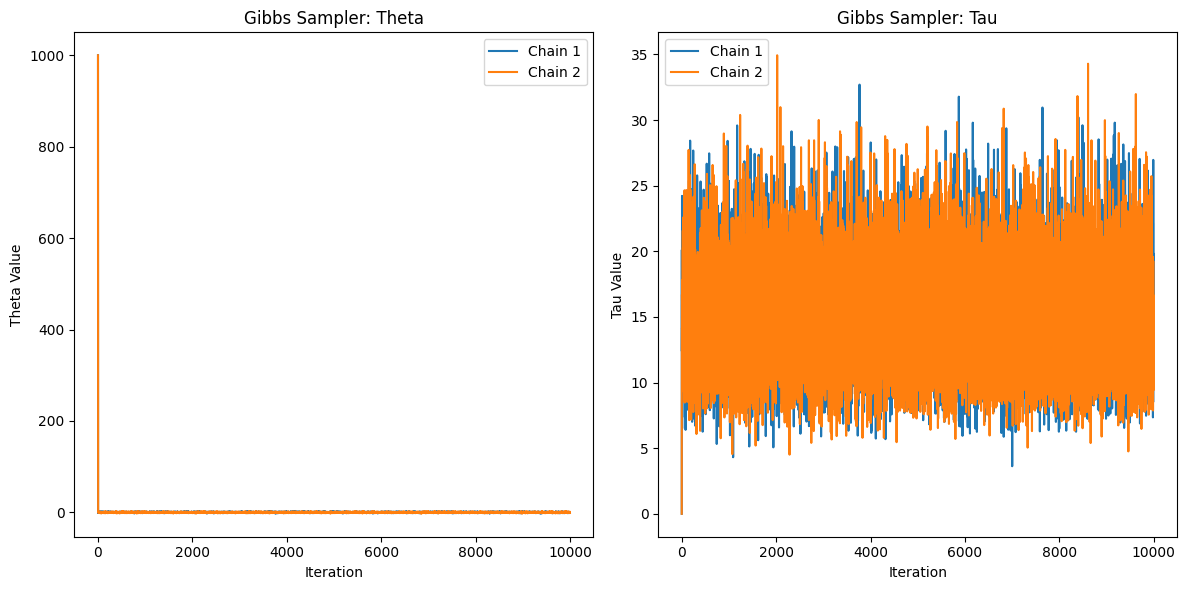

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
n = 30  # number of samples
x = stats.norm(loc=0, scale=1).rvs(size=n)  # generate random data from normal distribution
C, G = 2, 10000  # number of chains and Gibbs samples
shape = n / 2  # Gamma shape parameter
scale = 1  # initial scale for the gamma distribution

# Initialize arrays
theta = np.zeros([C, G])
tau = np.zeros([C, G])

# Initialize theta for all chains at the first sample
theta[:, 0] = 1000  # starting value for theta (arbitrary)

# Gibbs sampling
for c in range(C):  # loop over chains
    for g in range(1, G):  # loop over Gibbs iterations
        # Sample tau from the gamma distribution (conditional on theta)
        tau[c, g] = stats.gamma(a=shape, scale=scale).rvs()
        
        # Sample theta from the normal distribution (conditional on tau and x)
        mean_theta = np.mean(x)
        var_theta = tau[c, g] / n
        theta[c, g] = stats.norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

# Plot the results of theta and tau from the Gibbs sampler
plt.figure(figsize=(12, 6))

# Plot theta samples
plt.subplot(1, 2, 1)
plt.plot(theta[0, :], label="Chain 1")
plt.plot(theta[1, :], label="Chain 2")
plt.title("Gibbs Sampler: Theta")
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.legend()

# Plot tau samples
plt.subplot(1, 2, 2)
plt.plot(tau[0, :], label="Chain 1")
plt.plot(tau[1, :], label="Chain 2")
plt.title("Gibbs Sampler: Tau")
plt.xlabel("Iteration")
plt.ylabel("Tau Value")
plt.legend()

plt.tight_layout()
plt.show()



### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*


Full Conditional for $\theta$ given $\tau$ and $x$
$$p(\theta | \tau, \mathbf{x}) \propto \exp \left( - \frac{1}{2 \tau^2} \sum_{i=1}^n (x_i - \theta)^2 - \frac{1}{2 \tau_0^2} (\theta - \theta_0)^2 \right)
$$
Which simplified to a normal distribution
$$p(\theta | \tau, \mathbf{x}) \sim \mathcal{N} \left( \frac{\frac{1}{\tau^2} \sum_{i=1}^n x_i + \frac{\theta_0}{\tau_0^2}}{\frac{n}{\tau^2} + \frac{1}{\tau_0^2}}, \, \frac{1}{\frac{n}{\tau^2} + \frac{1}{\tau_0^2}} \right)
$$

Full Conditional for $\tau$ given $\theta$ and $x$
$$p(\tau | \theta, \mathbf{x}) \propto \tau^{\frac{\alpha}{2} - 1} \exp \left( - \frac{\lambda}{2} \tau \right) \exp \left( - \frac{1}{2 \tau^2} \sum_{i=1}^n (x_i - \theta)^2 \right)
$$
Simplified to a Gamma Distribution
$$p(\tau | \theta, \mathbf{x}) \sim \Gamma \left( \frac{n + \alpha}{2}, \frac{\lambda + \frac{1}{2} \sum_{i=1}^n (x_i - \theta)^2}{2} \right)
$$